#📌 Extracción

In [1]:
import pandas as pd
import json

# Cargar archivo JSON
with open('/content/sample_data/TelecomX_Data.json', 'r') as file:
    data = json.load(file)

# Normalizar datos anidados
df = pd.json_normalize(data)


#🔧 Transformación

In [3]:
# Conversión de columnas numéricas
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

# Crear columna Cuentas_Diarias
df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

# Corregir columna 'Churn' y binarizar
df['Churn'] = df['Churn'].replace('', pd.NA)
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convertir columnas "Sí/No" a binario
bin_cols = ['customer.Partner', 'customer.Dependents', 'phone.PhoneService',
            'internet.StreamingTV', 'internet.StreamingMovies',
            'internet.DeviceProtection', 'internet.TechSupport']
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


#📊 Carga y análisis

### 📊 Tabla descriptiva de variables numéricas

,Cantidad,Media,Desviación estándar,Mínimo,Q1,Q2 (Mediana),Q3,Máximo,Mediana (real)
account.Charges.Monthly,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75,70.35
account.Charges.Total,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80,1397.48
customer.tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00,29.00
Cuentas_Diarias,7043.0,2.16,1.00,0.61,1.18,2.34,2.99,3.96,2.34


<Figure size 1000x600 with 0 Axes>

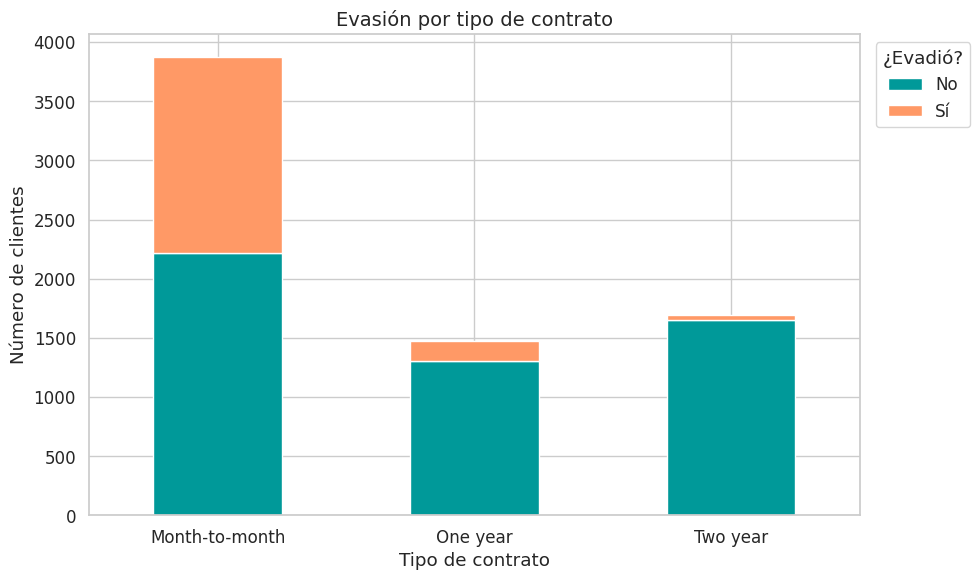

<Figure size 1200x600 with 0 Axes>

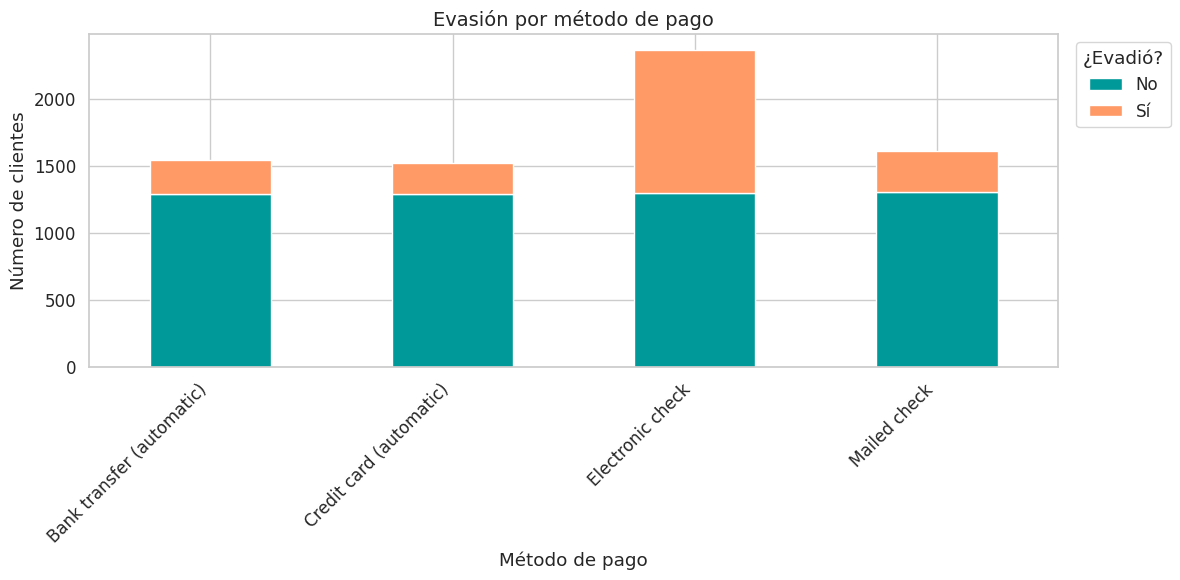

<Figure size 700x400 with 0 Axes>

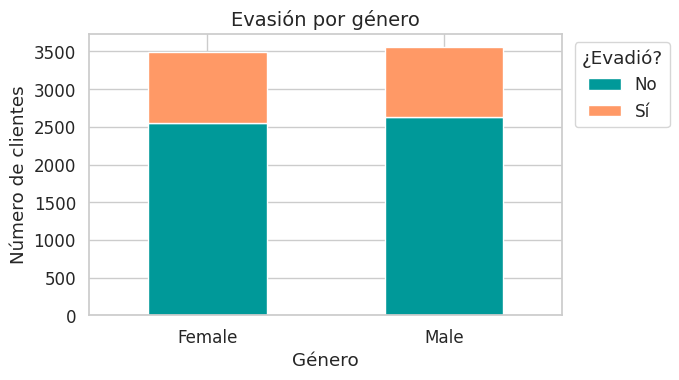

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo profesional
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Asegurar que la columna esté en español
df_valid['Churn_es'] = df_valid['Churn'].map({'Yes': 'Sí', 'No': 'No'})

# --------------------------------------
# TABLA DESCRIPTIVA PROFESIONAL
# --------------------------------------
desc_table = df_valid[['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure', 'Cuentas_Diarias']].describe().T
desc_table['Mediana (real)'] = df_valid[['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure', 'Cuentas_Diarias']].median()
desc_table['Desviación estándar'] = df_valid[['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure', 'Cuentas_Diarias']].std()

# Ordenar y renombrar columnas
desc_table = desc_table[['count', 'mean', 'Desviación estándar', 'min', '25%', '50%', '75%', 'max', 'Mediana (real)']]
desc_table = desc_table.rename(columns={
    'count': 'Cantidad',
    'mean': 'Media',
    'min': 'Mínimo',
    '25%': 'Q1',
    '50%': 'Q2 (Mediana)',
    '75%': 'Q3',
    'max': 'Máximo'
}).round(2)

# Mostrar tabla (en Colab o Jupyter)
from IPython.display import display, Markdown
display(Markdown("### 📊 Tabla descriptiva de variables numéricas"))
display(desc_table)

# --------------------------------------
# GRÁFICAS DE BARRAS
# --------------------------------------

# 1. Evasión por tipo de contrato
plt.figure(figsize=(10, 6))
contrato = df_valid.groupby(['account.Contract', 'Churn_es']).size().unstack().fillna(0)
contrato.plot(kind='bar', stacked=True, color=['#009999', '#FF9966'], figsize=(10, 6))
plt.title('Evasión por tipo de contrato', fontsize=14)
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.legend(title='¿Evadió?', loc='upper left', bbox_to_anchor=(1.01, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Evasión por método de pago
plt.figure(figsize=(12, 6))
pago = df_valid.groupby(['account.PaymentMethod', 'Churn_es']).size().unstack().fillna(0)
pago.plot(kind='bar', stacked=True, color=['#009999', '#FF9966'], figsize=(12, 6))
plt.title('Evasión por método de pago', fontsize=14)
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.legend(title='¿Evadió?', loc='upper left', bbox_to_anchor=(1.01, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Evasión por género
plt.figure(figsize=(7, 4))
genero = df_valid.groupby(['customer.gender', 'Churn_es']).size().unstack().fillna(0)
genero.plot(kind='bar', stacked=True, color=['#009999', '#FF9966'], figsize=(7, 4))
plt.title('Evasión por género', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.legend(title='¿Evadió?', loc='upper left', bbox_to_anchor=(1.01, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#📄Informe final

In [10]:
from IPython.display import Markdown

informe = """
## 📝 Informe Final: Análisis de Evasión de Clientes – Telecom X

---

### 📌 Resumen Ejecutivo

Este análisis tuvo como objetivo identificar los factores asociados con la evasión de clientes en Telecom X. A partir del conjunto de datos proporcionado, se aplicaron técnicas de limpieza, transformación y visualización para descubrir patrones de comportamiento y variables relevantes que inciden en la pérdida de clientes.

---

### 🔍 Principales Hallazgos

- **Tipo de contrato:** Los clientes con contrato "Mes a mes" representan la mayoría de los casos de evasión. Esto sugiere que la falta de compromiso a largo plazo facilita la cancelación del servicio.

- **Método de pago:** Los métodos como "Cheque electrónico" muestran una mayor tasa de evasión. Esto puede estar relacionado con clientes menos bancarizados o con hábitos de pago menos automatizados.

- **Antigüedad del cliente (tenure):** La mayoría de los clientes que cancelan su servicio llevan menos de 12 meses con la empresa. Esto indica que la fase inicial del ciclo de vida del cliente es crítica para su retención.

- **Cargos mensuales elevados:** Aquellos clientes que pagan más de $80 mensualmente muestran una ligera mayor tasa de cancelación, lo cual puede estar asociado a percepciones de valor o sobrecostos.

- **Género y otros factores sociodemográficos:** No se observaron diferencias significativas por género, lo que indica que la evasión no está directamente influenciada por esta variable.

---

### 💡 Recomendaciones Estratégicas

1. **Incentivar contratos a largo plazo:** Ofrecer descuentos, promociones o beneficios exclusivos para quienes opten por contratos anuales o semestrales puede disminuir la tasa de cancelación.

2. **Optimizar métodos de pago:** Fomentar el uso de pagos automatizados (tarjeta o débito bancario) puede reducir la evasión vinculada a medios menos confiables como el cheque electrónico.

3. **Mejorar la experiencia inicial del cliente:** Diseñar programas de onboarding más sólidos, con seguimiento personalizado durante los primeros 6 meses, ayudaría a fidelizar a nuevos usuarios.

4. **Segmentación de clientes con alto cargo mensual:** Implementar estrategias de retención personalizadas para los usuarios con cargos mensuales elevados, asegurando que perciban valor por el costo.

---

### 📈 Implicaciones para el Negocio

Estos hallazgos ofrecen una base sólida para definir estrategias de fidelización y rediseñar la propuesta de valor. Al comprender los perfiles y comportamientos de los clientes que más tienden a cancelar, Telecom X puede anticipar y reducir la evasión, lo que impactará positivamente en la rentabilidad y sostenibilidad de la empresa.

"""

display(Markdown(informe))




## 📝 Informe Final: Análisis de Evasión de Clientes – Telecom X

---

### 📌 Resumen Ejecutivo

Este análisis tuvo como objetivo identificar los factores asociados con la evasión de clientes en Telecom X. A partir del conjunto de datos proporcionado, se aplicaron técnicas de limpieza, transformación y visualización para descubrir patrones de comportamiento y variables relevantes que inciden en la pérdida de clientes.

---

### 🔍 Principales Hallazgos

- **Tipo de contrato:** Los clientes con contrato "Mes a mes" representan la mayoría de los casos de evasión. Esto sugiere que la falta de compromiso a largo plazo facilita la cancelación del servicio.
  
- **Método de pago:** Los métodos como "Cheque electrónico" muestran una mayor tasa de evasión. Esto puede estar relacionado con clientes menos bancarizados o con hábitos de pago menos automatizados.
  
- **Antigüedad del cliente (tenure):** La mayoría de los clientes que cancelan su servicio llevan menos de 12 meses con la empresa. Esto indica que la fase inicial del ciclo de vida del cliente es crítica para su retención.
  
- **Cargos mensuales elevados:** Aquellos clientes que pagan más de $80 mensualmente muestran una ligera mayor tasa de cancelación, lo cual puede estar asociado a percepciones de valor o sobrecostos.

- **Género y otros factores sociodemográficos:** No se observaron diferencias significativas por género, lo que indica que la evasión no está directamente influenciada por esta variable.

---

### 💡 Recomendaciones Estratégicas

1. **Incentivar contratos a largo plazo:** Ofrecer descuentos, promociones o beneficios exclusivos para quienes opten por contratos anuales o semestrales puede disminuir la tasa de cancelación.

2. **Optimizar métodos de pago:** Fomentar el uso de pagos automatizados (tarjeta o débito bancario) puede reducir la evasión vinculada a medios menos confiables como el cheque electrónico.

3. **Mejorar la experiencia inicial del cliente:** Diseñar programas de onboarding más sólidos, con seguimiento personalizado durante los primeros 6 meses, ayudaría a fidelizar a nuevos usuarios.

4. **Segmentación de clientes con alto cargo mensual:** Implementar estrategias de retención personalizadas para los usuarios con cargos mensuales elevados, asegurando que perciban valor por el costo.

---

### 📈 Implicaciones para el Negocio

Estos hallazgos ofrecen una base sólida para definir estrategias de fidelización y rediseñar la propuesta de valor. Al comprender los perfiles y comportamientos de los clientes que más tienden a cancelar, Telecom X puede anticipar y reducir la evasión, lo que impactará positivamente en la rentabilidad y sostenibilidad de la empresa.

